# MONTHLY SLEEP LOG ANALYSIS

In [12]:
from datetime import date, time, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib import gridspec
import seaborn as sns
from mdutils.mdutils import MdUtils

# IMPORTING DATA

In [13]:
# IMPORT CSV DATA
sleep_df = pd.read_csv('samsunghealth_NAME_20230701212511/com.samsung.shealth.sleep.20230701212511.csv', skiprows=[0,2], index_col=False)
sleep_df

,original_efficiency,mental_recovery,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,...,com.samsung.health.sleep.start_time,com.samsung.health.sleep.custom,com.samsung.health.sleep.update_time,com.samsung.health.sleep.create_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.deviceuuid,com.samsung.health.sleep.comment,com.samsung.health.sleep.pkg_name,com.samsung.health.sleep.end_time,com.samsung.health.sleep.datauuid
0,NaN,86.00,26.00,33.00,5.00,4.00,44.00,469.00,139.00,0.00,...,2022-08-14 22:44:00.000,NaN,2022-08-15 06:40:03.873,2022-08-15 06:38:38.893,UTC+0300,GayzxpvVxU,NaN,com.sec.android.app.shealth,2022-08-15 06:33:00.000,9ee896ff-58f6-45a1-8b0c-37fb0c393784
1,NaN,70.00,0.00,12.00,0.00,0.00,18.00,97.00,0.00,0.00,...,2022-08-18 10:51:00.000,NaN,2022-08-18 12:33:09.708,2022-08-18 12:33:07.006,UTC+0300,GayzxpvVxU,NaN,com.sec.android.app.shealth,2022-08-18 12:28:00.000,6178d79e-610f-40cf-8498-c52de3458a74
2,NaN,76.00,9.00,9.00,2.00,4.00,18.00,241.00,105.00,0.00,...,2022-08-15 23:41:00.000,NaN,2022-08-16 03:47:12.249,2022-08-16 03:47:03.145,UTC+0300,GayzxpvVxU,NaN,com.sec.android.app.shealth,2022-08-16 03:42:00.000,9a10971f-34db-44b8-aafc-da0d264f9261
3,NaN,99.00,8.00,44.00,1.00,6.00,42.00,478.00,44.00,0.00,...,2022-08-17 23:14:00.000,NaN,2022-08-18 07:13:19.009,2022-08-18 07:13:02.779,UTC+0300,GayzxpvVxU,NaN,com.sec.android.app.shealth,2022-08-18 07:12:00.000,f922d8ee-f0db-4bf5-9c04-927eca9f528f
4,NaN,72.00,12.00,33.00,7.00,13.00,62.00,447.00,54.00,1.00,...,2022-08-19 00:08:00.000,NaN,2022-08-19 07:45:50.253,2022-08-19 07:45:26.896,UTC+0300,GayzxpvVxU,NaN,com.sec.android.app.shealth,2022-08-19 07:35:00.000,55fdda4b-3c61-44f0-adbb-4bf8f623b200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,NaN,73.00,16.00,16.00,3.00,2.00,36.00,187.00,121.00,0.00,...,2023-06-16 05:36:00.000,NaN,2023-06-16 08:45:55.325,2023-06-16 08:45:48.495,UTC+0300,GayzxpvVxU,NaN,com.sec.android.app.shealth,2023-06-16 08:43:00.000,b900f76c-a893-4b4b-8d77-7ff1b2a0fae0
468,NaN,48.00,11.00,11.00,17.00,22.00,39.00,213.00,121.00,1.00,...,2023-07-01 04:58:00.000,NaN,2023-07-01 08:41:53.611,2023-07-01 08:41:47.575,UTC+0300,GayzxpvVxU,NaN,com.sec.android.app.shealth,2023-07-01 08:31:00.000,e18581d9-b36b-48f6-a805-7039a6fe5b3d
469,NaN,80.00,19.00,19.00,6.00,5.00,27.00,342.00,149.00,0.00,...,2023-06-20 01:17:00.000,NaN,2023-06-20 07:06:11.982,2023-06-20 07:06:04.319,UTC+0300,GayzxpvVxU,NaN,com.sec.android.app.shealth,2023-06-20 06:59:00.000,890e0c32-d561-46bd-8d8b-e2ccb921adcd
470,NaN,28.00,8.00,47.00,5.00,42.00,76.00,524.00,82.00,3.00,...,2023-06-25 00:40:00.000,NaN,2023-06-25 09:30:05.040,2023-06-25 09:29:52.900,UTC+0300,GayzxpvVxU,NaN,com.sec.android.app.shealth,2023-06-25 09:24:00.000,ff241254-43d4-4e7e-89b4-3d88b07d4eed


# PREPARING DATA

In [14]:
#DROP COLUMNS WITH ALL NAN ELEMENTS
#original_efficiency, original_wake_up_time, original_bed_time, custom, comment
sleep_df.dropna(axis=1, how='all', inplace=True)

# DROP OTHER NON-NAN COLUMNS
sleep_df.drop([
    'factor_01','factor_02','factor_03','factor_04','factor_05',
    'factor_06','factor_07','factor_08','factor_09','factor_10',
    'has_sleep_data','combined_id','data_version', 'quality','extra_data',
    'com.samsung.health.sleep.pkg_name','com.samsung.health.sleep.datauuid'
    ], axis=1, inplace=True)

# RENAME REMAINING COLUMNS
sleep_df.rename(columns={'com.samsung.health.sleep.start_time': 'start_time',
                 'com.samsung.health.sleep.update_time': 'update_time',
                 'com.samsung.health.sleep.create_time': 'create_time',
                 'com.samsung.health.sleep.time_offset': 'time_offset',
                 'com.samsung.health.sleep.deviceuuid': 'deviceuuid',
                 'com.samsung.health.sleep.end_time': 'end_time'},
               inplace=True)


# REPLACE ZEROES TO NAN IN THIS COLUMN
sleep_df['efficiency'] = sleep_df['efficiency'].replace({'0':np.nan, 0:np.nan})
#sleep_df['efficiency'] = sleep_df['efficiency'].mask(sleep_df['efficiency'].eq(0).all(axis=1))


sleep_df

,mental_recovery,physical_recovery,movement_awakening,sleep_cycle,efficiency,sleep_score,sleep_duration,start_time,update_time,create_time,time_offset,deviceuuid,end_time
0,86.00,61.00,19.00,4.00,90.00,77.00,469.00,2022-08-14 22:44:00.000,2022-08-15 06:40:03.873,2022-08-15 06:38:38.893,UTC+0300,GayzxpvVxU,2022-08-15 06:33:00.000
1,70.00,22.00,35.00,0.00,81.00,49.00,97.00,2022-08-18 10:51:00.000,2022-08-18 12:33:09.708,2022-08-18 12:33:07.006,UTC+0300,GayzxpvVxU,2022-08-18 12:28:00.000
2,76.00,31.00,11.00,2.00,92.00,71.00,241.00,2022-08-15 23:41:00.000,2022-08-16 03:47:12.249,2022-08-16 03:47:03.145,UTC+0300,GayzxpvVxU,2022-08-16 03:42:00.000
3,99.00,64.00,13.00,7.00,91.00,72.00,478.00,2022-08-17 23:14:00.000,2022-08-18 07:13:19.009,2022-08-18 07:13:02.779,UTC+0300,GayzxpvVxU,2022-08-18 07:12:00.000
4,72.00,61.00,35.00,5.00,86.00,68.00,447.00,2022-08-19 00:08:00.000,2022-08-19 07:45:50.253,2022-08-19 07:45:26.896,UTC+0300,GayzxpvVxU,2022-08-19 07:35:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,73.00,33.00,38.00,1.00,80.00,61.00,187.00,2023-06-16 05:36:00.000,2023-06-16 08:45:55.325,2023-06-16 08:45:48.495,UTC+0300,GayzxpvVxU,2023-06-16 08:43:00.000
468,48.00,30.00,45.00,2.00,81.00,46.00,213.00,2023-07-01 04:58:00.000,2023-07-01 08:41:53.611,2023-07-01 08:41:47.575,UTC+0300,GayzxpvVxU,2023-07-01 08:31:00.000
469,80.00,45.00,15.00,3.00,92.00,70.00,342.00,2023-06-20 01:17:00.000,2023-06-20 07:06:11.982,2023-06-20 07:06:04.319,UTC+0300,GayzxpvVxU,2023-06-20 06:59:00.000
470,28.00,65.00,30.00,6.00,85.00,65.00,524.00,2023-06-25 00:40:00.000,2023-06-25 09:30:05.040,2023-06-25 09:29:52.900,UTC+0300,GayzxpvVxU,2023-06-25 09:24:00.000


In [15]:
# TURN INTO DATETIME, DATE, TIME
sleep_df['start_dt'] = pd.to_datetime(sleep_df['start_time'], format = '%Y/%m/%d %H:%M:%S.%f')
sleep_df['start_date'] = sleep_df['start_dt'].dt.normalize()
sleep_df['start_hour'] = pd.to_datetime([d.time() for d in sleep_df['start_dt']], format = '%H:%M:%S')

sleep_df['end_dt'] = pd.to_datetime(sleep_df['end_time'], format = '%Y/%m/%d %H:%M:%S.%f')
sleep_df['end_date'] = sleep_df['end_dt'].dt.normalize()
sleep_df['end_hour'] = pd.to_datetime([d.time() for d in sleep_df['end_dt']], format = '%H:%M:%S')

# SLEEP IN HOURS
sleep_df['duration'] = (sleep_df['end_dt']-sleep_df['start_dt']).astype('timedelta64[m]')/60

# HOURS AWAKE THAT DAY?
#sleep_df['awake'] = [ [] for d in sleep_df]

sleep_df

,mental_recovery,physical_recovery,movement_awakening,sleep_cycle,efficiency,sleep_score,sleep_duration,start_time,update_time,create_time,time_offset,deviceuuid,end_time,start_dt,start_date,start_hour,end_dt,end_date,end_hour,duration
0,86.00,61.00,19.00,4.00,90.00,77.00,469.00,2022-08-14 22:44:00.000,2022-08-15 06:40:03.873,2022-08-15 06:38:38.893,UTC+0300,GayzxpvVxU,2022-08-15 06:33:00.000,2022-08-14 22:44:00,2022-08-14,1900-01-01 22:44:00,2022-08-15 06:33:00,2022-08-15,1900-01-01 06:33:00,7.82
1,70.00,22.00,35.00,0.00,81.00,49.00,97.00,2022-08-18 10:51:00.000,2022-08-18 12:33:09.708,2022-08-18 12:33:07.006,UTC+0300,GayzxpvVxU,2022-08-18 12:28:00.000,2022-08-18 10:51:00,2022-08-18,1900-01-01 10:51:00,2022-08-18 12:28:00,2022-08-18,1900-01-01 12:28:00,1.62
2,76.00,31.00,11.00,2.00,92.00,71.00,241.00,2022-08-15 23:41:00.000,2022-08-16 03:47:12.249,2022-08-16 03:47:03.145,UTC+0300,GayzxpvVxU,2022-08-16 03:42:00.000,2022-08-15 23:41:00,2022-08-15,1900-01-01 23:41:00,2022-08-16 03:42:00,2022-08-16,1900-01-01 03:42:00,4.02
3,99.00,64.00,13.00,7.00,91.00,72.00,478.00,2022-08-17 23:14:00.000,2022-08-18 07:13:19.009,2022-08-18 07:13:02.779,UTC+0300,GayzxpvVxU,2022-08-18 07:12:00.000,2022-08-17 23:14:00,2022-08-17,1900-01-01 23:14:00,2022-08-18 07:12:00,2022-08-18,1900-01-01 07:12:00,7.97
4,72.00,61.00,35.00,5.00,86.00,68.00,447.00,2022-08-19 00:08:00.000,2022-08-19 07:45:50.253,2022-08-19 07:45:26.896,UTC+0300,GayzxpvVxU,2022-08-19 07:35:00.000,2022-08-19 00:08:00,2022-08-19,1900-01-01 00:08:00,2022-08-19 07:35:00,2022-08-19,1900-01-01 07:35:00,7.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,73.00,33.00,38.00,1.00,80.00,61.00,187.00,2023-06-16 05:36:00.000,2023-06-16 08:45:55.325,2023-06-16 08:45:48.495,UTC+0300,GayzxpvVxU,2023-06-16 08:43:00.000,2023-06-16 05:36:00,2023-06-16,1900-01-01 05:36:00,2023-06-16 08:43:00,2023-06-16,1900-01-01 08:43:00,3.12
468,48.00,30.00,45.00,2.00,81.00,46.00,213.00,2023-07-01 04:58:00.000,2023-07-01 08:41:53.611,2023-07-01 08:41:47.575,UTC+0300,GayzxpvVxU,2023-07-01 08:31:00.000,2023-07-01 04:58:00,2023-07-01,1900-01-01 04:58:00,2023-07-01 08:31:00,2023-07-01,1900-01-01 08:31:00,3.55
469,80.00,45.00,15.00,3.00,92.00,70.00,342.00,2023-06-20 01:17:00.000,2023-06-20 07:06:11.982,2023-06-20 07:06:04.319,UTC+0300,GayzxpvVxU,2023-06-20 06:59:00.000,2023-06-20 01:17:00,2023-06-20,1900-01-01 01:17:00,2023-06-20 06:59:00,2023-06-20,1900-01-01 06:59:00,5.70
470,28.00,65.00,30.00,6.00,85.00,65.00,524.00,2023-06-25 00:40:00.000,2023-06-25 09:30:05.040,2023-06-25 09:29:52.900,UTC+0300,GayzxpvVxU,2023-06-25 09:24:00.000,2023-06-25 00:40:00,2023-06-25,1900-01-01 00:40:00,2023-06-25 09:24:00,2023-06-25,1900-01-01 09:24:00,8.73


# ANALYSING DATA

In [30]:
# WHICH MONTH???
range_month = str('2023-06')

range_month_dt = pd.to_datetime(range_month)
sleep_df_m = sleep_df.loc[(sleep_df['start_dt'] >= range_month_dt) & (sleep_df['end_dt'] <= (range_month_dt + pd.DateOffset(months=1)))]
sleep_df_m = sleep_df_m.sort_values(["start_dt"], ascending=True)
sleep_df_m.reset_index(drop=True, inplace=True)
sleep_df_m


,mental_recovery,physical_recovery,movement_awakening,sleep_cycle,efficiency,sleep_score,sleep_duration,start_time,update_time,create_time,time_offset,deviceuuid,end_time,start_dt,start_date,start_hour,end_dt,end_date,end_hour,duration
0,89.00,73.00,30.00,5.00,84.00,78.00,501.00,2023-06-01 00:53:00.000,2023-06-01 09:15:20.539,2023-06-01 09:15:07.632,UTC+0300,GayzxpvVxU,2023-06-01 09:14:00.000,2023-06-01 00:53:00,2023-06-01,1900-01-01 00:53:00,2023-06-01 09:14:00,2023-06-01,1900-01-01 09:14:00,8.35
1,59.00,73.00,28.00,4.00,85.00,67.00,540.00,2023-06-02 00:26:00.000,2023-06-02 09:44:05.605,2023-06-02 09:43:41.977,UTC+0300,GayzxpvVxU,2023-06-02 09:26:00.000,2023-06-02 00:26:00,2023-06-02,1900-01-01 00:26:00,2023-06-02 09:26:00,2023-06-02,1900-01-01 09:26:00,9.00
2,31.00,75.00,33.00,4.00,85.00,64.00,557.00,2023-06-03 00:34:00.000,2023-06-03 09:55:09.963,2023-06-03 09:52:51.441,UTC+0300,GayzxpvVxU,2023-06-03 09:51:00.000,2023-06-03 00:34:00,2023-06-03,1900-01-01 00:34:00,2023-06-03 09:51:00,2023-06-03,1900-01-01 09:51:00,9.28
3,72.00,72.00,26.00,6.00,85.00,72.00,538.00,2023-06-04 00:18:00.000,2023-06-04 09:17:36.818,2023-06-04 09:17:26.842,UTC+0300,GayzxpvVxU,2023-06-04 09:16:00.000,2023-06-04 00:18:00,2023-06-04,1900-01-01 00:18:00,2023-06-04 09:16:00,2023-06-04,1900-01-01 09:16:00,8.97
4,45.00,56.00,44.00,5.00,83.00,57.00,484.00,2023-06-05 00:31:00.000,2023-06-05 08:48:27.783,2023-06-05 08:48:19.368,UTC+0300,GayzxpvVxU,2023-06-05 08:35:00.000,2023-06-05 00:31:00,2023-06-05,1900-01-01 00:31:00,2023-06-05 08:35:00,2023-06-05,1900-01-01 08:35:00,8.07
5,0.00,69.00,45.00,4.00,80.00,58.00,568.00,2023-06-05 23:36:00.000,2023-06-06 09:10:02.980,2023-06-06 09:09:52.143,UTC+0300,GayzxpvVxU,2023-06-06 09:04:00.000,2023-06-05 23:36:00,2023-06-05,1900-01-01 23:36:00,2023-06-06 09:04:00,2023-06-06,1900-01-01 09:04:00,9.47
6,65.00,70.00,34.00,3.00,85.00,68.00,543.00,2023-06-07 00:24:00.000,2023-06-07 09:36:29.815,2023-06-07 09:36:17.538,UTC+0300,GayzxpvVxU,2023-06-07 09:27:00.000,2023-06-07 00:24:00,2023-06-07,1900-01-01 00:24:00,2023-06-07 09:27:00,2023-06-07,1900-01-01 09:27:00,9.05
7,58.00,71.00,28.00,7.00,85.00,60.00,559.00,2023-06-07 23:53:00.000,2023-06-08 09:15:00.743,2023-06-08 09:14:48.038,UTC+0300,GayzxpvVxU,2023-06-08 09:12:00.000,2023-06-07 23:53:00,2023-06-07,1900-01-01 23:53:00,2023-06-08 09:12:00,2023-06-08,1900-01-01 09:12:00,9.32
8,60.00,65.00,32.00,5.00,86.00,63.00,538.00,2023-06-09 00:04:00.000,2023-06-09 09:12:49.660,2023-06-09 09:12:32.636,UTC+0300,GayzxpvVxU,2023-06-09 09:02:00.000,2023-06-09 00:04:00,2023-06-09,1900-01-01 00:04:00,2023-06-09 09:02:00,2023-06-09,1900-01-01 09:02:00,8.97
9,65.00,55.00,37.00,2.00,86.00,64.00,472.00,2023-06-10 00:44:00.000,2023-06-10 08:38:42.840,2023-06-10 08:38:34.481,UTC+0300,GayzxpvVxU,2023-06-10 08:36:00.000,2023-06-10 00:44:00,2023-06-10,1900-01-01 00:44:00,2023-06-10 08:36:00,2023-06-10,1900-01-01 08:36:00,7.87


In [31]:
sleep_df_mc = sleep_df_m.drop(['sleep_duration', 'start_time','end_time', 'update_time', 'create_time', 'time_offset', 
                               'deviceuuid', 'start_date', 'start_hour', 'end_date', 'end_hour'], axis=1)

sleep_df_mc['start_link'] = sleep_df_mc['start_dt'].apply(lambda x: "[[" + x.strftime("%Y-%m-%d %a") + "]]")
sleep_df_mc['end_link'] = sleep_df_mc['end_dt'].apply(lambda x: "[[" + x.strftime("%Y-%m-%d %a") + "]]")
sleep_df_mc['days'] = sleep_df_mc['start_link'] + " - " + sleep_df_mc['end_link']

sleep_df_mc = sleep_df_mc.drop(['start_link', 'end_link'], axis=1)

sleep_df_mc.rename(columns={'start_dt': 'slept at', 'end_dt': 'woke up at',
                           'sleep_score': 'sleep score', 'sleep_cycle': 'sleep cycle',
                            'mental_recovery': 'mental recovery', 'physical_recovery': 'physical recovery',
                            'movement_awakening': 'movement awakening'}, inplace=True)

sleep_df_mc = sleep_df_mc[['days', 'slept at', 'woke up at', 'duration', 'sleep score', 'efficiency',
                           'sleep cycle', 'mental recovery', 'physical recovery', 'movement awakening']]

sleep_df_mc

,days,slept at,woke up at,duration,sleep score,efficiency,sleep cycle,mental recovery,physical recovery,movement awakening
0,[[2023-06-01 Thu]] - [[2023-06-01 Thu]],2023-06-01 00:53:00,2023-06-01 09:14:00,8.35,78.00,84.00,5.00,89.00,73.00,30.00
1,[[2023-06-02 Fri]] - [[2023-06-02 Fri]],2023-06-02 00:26:00,2023-06-02 09:26:00,9.00,67.00,85.00,4.00,59.00,73.00,28.00
2,[[2023-06-03 Sat]] - [[2023-06-03 Sat]],2023-06-03 00:34:00,2023-06-03 09:51:00,9.28,64.00,85.00,4.00,31.00,75.00,33.00
3,[[2023-06-04 Sun]] - [[2023-06-04 Sun]],2023-06-04 00:18:00,2023-06-04 09:16:00,8.97,72.00,85.00,6.00,72.00,72.00,26.00
4,[[2023-06-05 Mon]] - [[2023-06-05 Mon]],2023-06-05 00:31:00,2023-06-05 08:35:00,8.07,57.00,83.00,5.00,45.00,56.00,44.00
5,[[2023-06-05 Mon]] - [[2023-06-06 Tue]],2023-06-05 23:36:00,2023-06-06 09:04:00,9.47,58.00,80.00,4.00,0.00,69.00,45.00
6,[[2023-06-07 Wed]] - [[2023-06-07 Wed]],2023-06-07 00:24:00,2023-06-07 09:27:00,9.05,68.00,85.00,3.00,65.00,70.00,34.00
7,[[2023-06-07 Wed]] - [[2023-06-08 Thu]],2023-06-07 23:53:00,2023-06-08 09:12:00,9.32,60.00,85.00,7.00,58.00,71.00,28.00
8,[[2023-06-09 Fri]] - [[2023-06-09 Fri]],2023-06-09 00:04:00,2023-06-09 09:02:00,8.97,63.00,86.00,5.00,60.00,65.00,32.00
9,[[2023-06-10 Sat]] - [[2023-06-10 Sat]],2023-06-10 00:44:00,2023-06-10 08:36:00,7.87,64.00,86.00,2.00,65.00,55.00,37.00


In [32]:
# SUMMARY OF SOME BASIC STATS
pd.set_option('display.float_format', lambda x: '%.2f' % x)

sleep_df_ms = sleep_df_m.copy()

sleep_df_ms = sleep_df_ms[['mental_recovery','physical_recovery', 'movement_awakening', 'efficiency','sleep_score',
                          'duration', 'start_hour', 'end_hour']].describe(percentiles=[], include='all', datetime_is_numeric=True)
sleep_df_ms = sleep_df_ms[['start_hour', 'end_hour', 'duration', 'sleep_score', 'efficiency',
                           'mental_recovery', 'physical_recovery', 'movement_awakening']]

sleep_df_ms["start_hour"].iloc[1:5] = pd.to_datetime(sleep_df_ms["start_hour"].iloc[1:5], errors='coerce').dt.time
sleep_df_ms["end_hour"].iloc[1:5] = pd.to_datetime(sleep_df_ms["end_hour"].iloc[1:5], errors='coerce').dt.time

start_max = sleep_df_m['start_hour'].loc[(sleep_df_m['start_hour'] >= '1900-01-01 00:00:00') & (sleep_df_m['start_hour'] <= '1900-01-01 12:00:00')].max().strftime('%H:%M:%S')
start_min = sleep_df_m['start_hour'].loc[(sleep_df_m['start_hour'] >= '1900-01-01 18:00:00') & (sleep_df_m['start_hour'] <= '1900-01-01 23:59:59')].min().strftime('%H:%M:%S')

sleep_df_ms['start_hour']['min'] = start_min
sleep_df_ms['start_hour']['max'] = start_max


sleep_df_ms

C:\Users\Yugen\AppData\Local\Temp\ipykernel_13816\186183975.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_df_ms['start_hour']['min'] = start_min
C:\Users\Yugen\AppData\Local\Temp\ipykernel_13816\186183975.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_df_ms['start_hour']['max'] = start_max


,start_hour,end_hour,duration,sleep_score,efficiency,mental_recovery,physical_recovery,movement_awakening
count,34,34,34.00,34.00,34.00,34.00,34.00,34.00
mean,06:48:54.705882,08:26:21.176470,7.27,65.09,85.62,60.38,58.71,30.62
min,21:47:00,04:29:00,2.62,45.00,75.00,0.00,24.00,12.00
50%,01:04:30,08:57:00,8.07,65.50,86.00,65.00,63.50,28.00
max,07:16:00,09:55:00,9.77,78.00,94.00,89.00,78.00,91.00
std,NaN,NaN,2.13,8.41,4.36,20.91,14.73,13.73


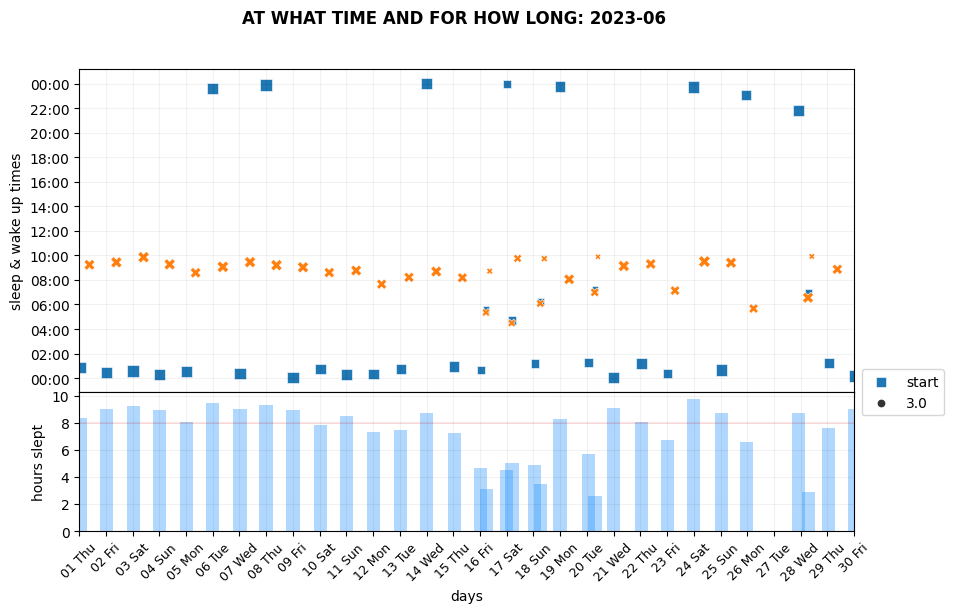

In [33]:
# FIGURE 1/3. AT WHAT TIME AND FOR HOW LONG
fig = plt.figure(figsize = (10,6))
gs = gridspec.GridSpec(2, 1, height_ratios=[7, 3]) 
#markers={'start': 10, 'end': 11}



# DAY VS SLEEP&WAKEUPTIME PLOT
ax0 = plt.subplot(gs[0])
ax0 = sns.scatterplot(data=sleep_df_m, x='start_dt', y='start_hour',
                      size='duration', marker='s', legend='brief', label='start')
ax0 = sns.scatterplot(data=sleep_df_m, x='end_dt', y='end_hour',
                      size='duration', marker='X', legend='brief', label='end')



ax0 = plt.gca()
ax0.set_xlim(sleep_df_m['start_date'].min(), sleep_df_m['start_date'].max())
ax0.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%d %a'))
ax0.tick_params(axis='x', labelbottom=False)

ax0.set_ylabel('sleep & wake up times')
ax0.yaxis.set_major_locator(mdates.HourLocator(interval=2))
ax0.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax0.grid(visible='on', axis='both', color='k', linestyle='-', alpha=0.05)




#LABEL
handles, labels = ax0.get_legend_handles_labels()
order = [0,7]
plt.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=(1.125, 0.), loc='right')




# DAY VS SLEEPDURATION PLOT
ax1 = plt.subplot(gs[1], sharex = ax0)
ax1 = plt.bar(sleep_df_m['start_dt'], sleep_df_m['duration'],
              color='dodgerblue', alpha=0.35, width=0.5)

ax1 = plt.gca()
ax1.set_xlabel('days')
ax1.set_xlim(sleep_df_m['start_date'].min(), sleep_df_m['start_date'].max())
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %a'))
ax1.tick_params(axis='x', labelrotation=45, which='major', labelsize=9)
ax1.set_ylabel('hours slept')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.grid(which='both', axis='both', color='k', linestyle='-', alpha=0.05)
ax1.axhline(y=8, color='r', linestyle='-', alpha=0.1)


# TITLE AND SAVE PLOT
plt.subplots_adjust(hspace=0.0)
fig.suptitle('AT WHAT TIME AND FOR HOW LONG: ' + range_month, fontsize=12, fontweight='semibold')
fig.savefig(range_month + ' - sleep times and durations.jpg', dpi=150)


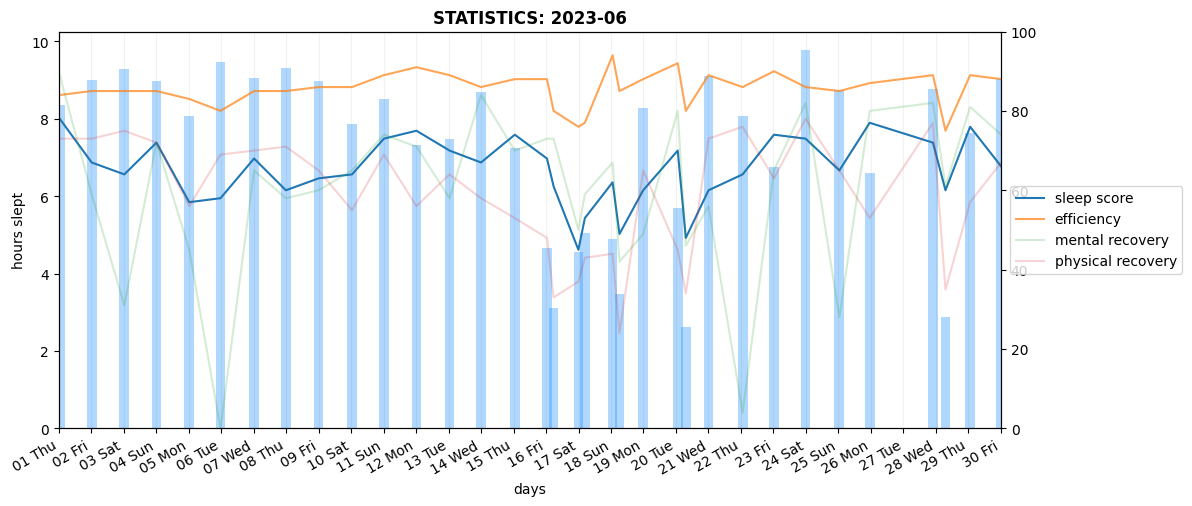

In [34]:
# FIGURE 2/3. STATISTICS
fig, axs = plt.subplots(figsize = (12,5))


# DAY VS DURATION
ax0 = plt.bar(sleep_df_m['start_dt'], sleep_df_m['duration'],
              color='dodgerblue', alpha=0.35, width=0.3, zorder=0)

ax0 = plt.gca()
ax0.set_xlabel('days')
ax0.set_xlim(sleep_df_m['start_date'].min(), sleep_df_m['start_date'].max())
ax0.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%d %a'))
plt.gcf().autofmt_xdate()
ax0.set_ylabel('hours slept')
ax0.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax0.grid(which='both', axis='x', color='k', linestyle='-', alpha=0.05)
#ax1.axhline(y=8, color='r', linestyle='-', alpha=0.25)



# DAY VS. OTHER STATS
ax1 = ax0.twinx()

ax1 = sns.lineplot(data=sleep_df_m, x='start_dt', y='sleep_score', legend='brief', label='sleep score')
ax1 = sns.lineplot(data=sleep_df_m, x='start_dt', y='efficiency', legend='brief', label='efficiency', alpha=0.7)
ax1 = sns.lineplot(data=sleep_df_m, x='start_dt', y='mental_recovery', legend='brief', label='mental recovery', alpha=0.2)
ax1 = sns.lineplot(data=sleep_df_m, x='start_dt', y='physical_recovery', legend='brief', label='physical recovery', alpha=0.2)

ax1.set_ylabel('')
ax1.set_ylim((0,100))
#ax1.grid(visible='on', axis='both', color='k', linestyle='-', alpha=0.05)


# LABELS
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1)


# TITLE AND SAVE PLOT
plt.tight_layout()
plt.title('STATISTICS: ' + range_month, fontsize=12, fontweight='semibold')
fig.savefig(range_month + ' - sleep statistics.jpg', dpi=150)


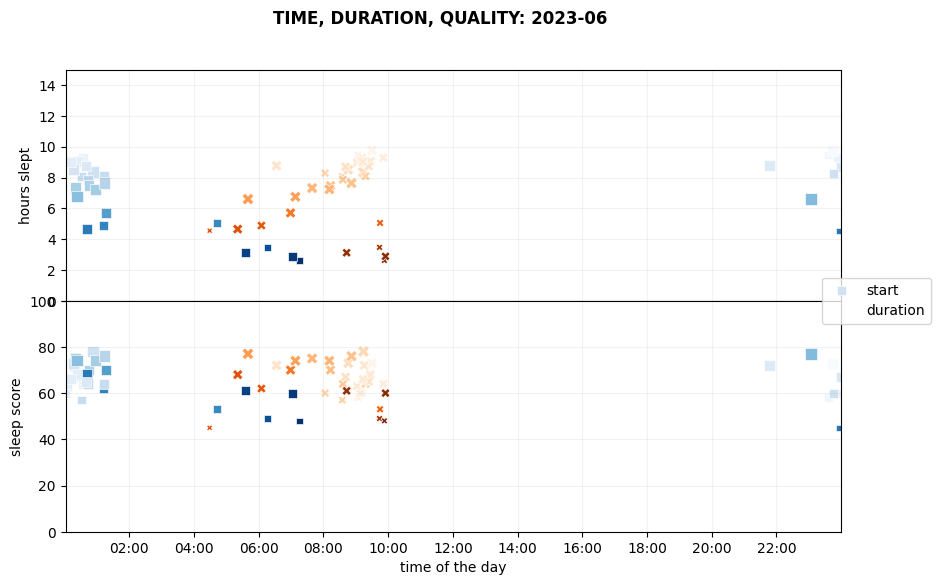

In [35]:
# FIGURE 3/3. TIME, DURATION, QUALITY
fig = plt.figure(figsize = (10,6))
gs = gridspec.GridSpec(2, 1, height_ratios=[1,1]) 



# TIME VS. SLEEP DURATION
ax0 = plt.subplot(gs[0])
ax0 = sns.scatterplot(data=sleep_df_m, x='start_hour', y='duration', hue='duration', size='sleep_score',
                      palette='Blues_r', marker='s', legend=False)
ax0 = sns.scatterplot(data=sleep_df_m, x='end_hour', y='duration', hue='duration', size='sleep_score',
                      palette='Oranges_r', marker='X', legend=False)

ax0 = plt.gca()
ax0.set_xlim(sleep_df_m['start_hour'].min(), sleep_df_m['start_hour'].max())
ax0.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax0.tick_params(axis='x', labelbottom=False)
ax0.set_ylabel('hours slept')
ax0.set_ylim((0,15))
ax0.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax0.grid(color='k', linestyle='-', alpha=0.05)



# TIME VS. SLEEP SCORE
ax1 = plt.subplot(gs[1], sharex=ax0)
ax1 = sns.scatterplot(data=sleep_df_m, x='start_hour', y='sleep_score', hue='duration', size='sleep_score',
                      palette='Blues_r', marker='s', legend='brief', label='start')
ax1 = sns.scatterplot(data=sleep_df_m, x='end_hour', y='sleep_score', hue='duration', size='sleep_score',
                      palette='Oranges_r', marker='X', legend='brief', label='end')

ax1 = plt.gca()
ax1.set_xlabel('time of the day')
ax1.set_ylabel('sleep score')
ax1.set_ylim((0,100))
ax1.grid(color='k', linestyle='-', alpha=0.05)



#LABEL
handles, labels = ax1.get_legend_handles_labels()
order = [0,15]
plt.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=(1.125, 1), loc='right')



# TITLE AND SAVE PLOT
plt.subplots_adjust(hspace=0.0)
fig.suptitle('TIME, DURATION, QUALITY: ' + range_month, fontsize=12, fontweight='semibold')
fig.savefig(range_month + ' - sleep analysis.jpg', dpi=150)


# WRITING DATA

In [36]:
# CREATING NEW MARKDOWN
mdFile = MdUtils(file_name='SleepLog-Monthly - ' + range_month)

sleep_md_mc = sleep_df_mc.to_markdown()
sleep_md_ms = sleep_df_ms.to_markdown()



# DAILY ENTRY
mdFile.new_header(level=1, title="Daily Entries")
mdFile.new_line(sleep_md_mc)
mdFile.new_line()

mdFile.new_header(level=1, title="Monthly Summary")
mdFile.new_line(sleep_md_ms)
mdFile.new_line()

mdFile.new_header(level=1, title="Monthly Graphical Analysis")
mdFile.new_line("![[" + range_month + ' - sleep times and durations.jpg]]')
mdFile.new_line()
mdFile.new_line("![[" + range_month + ' - sleep statistics.jpg]]')
mdFile.new_line()
mdFile.new_line("![[" + range_month + ' - sleep analysis.jpg]]')
mdFile.new_line()


# CREATING MARKDOWN
mdFile.create_md_file()